In [2]:
# a ideia é utilizar features como total_rooms, total_bedrooms, population, households, median_income para prever o valor de median_house_value
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# uploadando os dados
data = pd.read_csv('housing.csv')

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
data.dropna(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [10]:
from sklearn.model_selection import train_test_split

X = data.drop('median_house_value', axis=1) # takes everything except the target variable
y = data['median_house_value'] # target variable

In [13]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [14]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
train_data = X_train.join(y_train)

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13328,-117.66,34.05,6.0,5129.0,1119.0,2533.0,949.0,3.6250,INLAND,113600.0
12388,-116.44,33.77,18.0,4872.0,1110.0,955.0,656.0,2.2439,INLAND,97500.0
8834,-118.37,34.09,22.0,4247.0,1253.0,1766.0,1170.0,3.1517,<1H OCEAN,341700.0
15913,-122.41,37.74,47.0,1728.0,398.0,1178.0,315.0,3.2813,NEAR BAY,229600.0
3368,-120.20,40.26,26.0,2399.0,518.0,1037.0,443.0,2.6765,INLAND,47600.0
...,...,...,...,...,...,...,...,...,...,...
15779,-122.41,37.78,52.0,254.0,72.0,153.0,29.0,3.8625,NEAR BAY,350000.0
6404,-118.03,34.14,31.0,4353.0,1117.0,2338.0,1037.0,3.0727,INLAND,242600.0
9936,-122.30,38.25,18.0,3548.0,880.0,1476.0,699.0,3.7188,NEAR BAY,163400.0
14950,-116.95,32.74,7.0,2722.0,578.0,1429.0,574.0,3.9583,<1H OCEAN,141700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

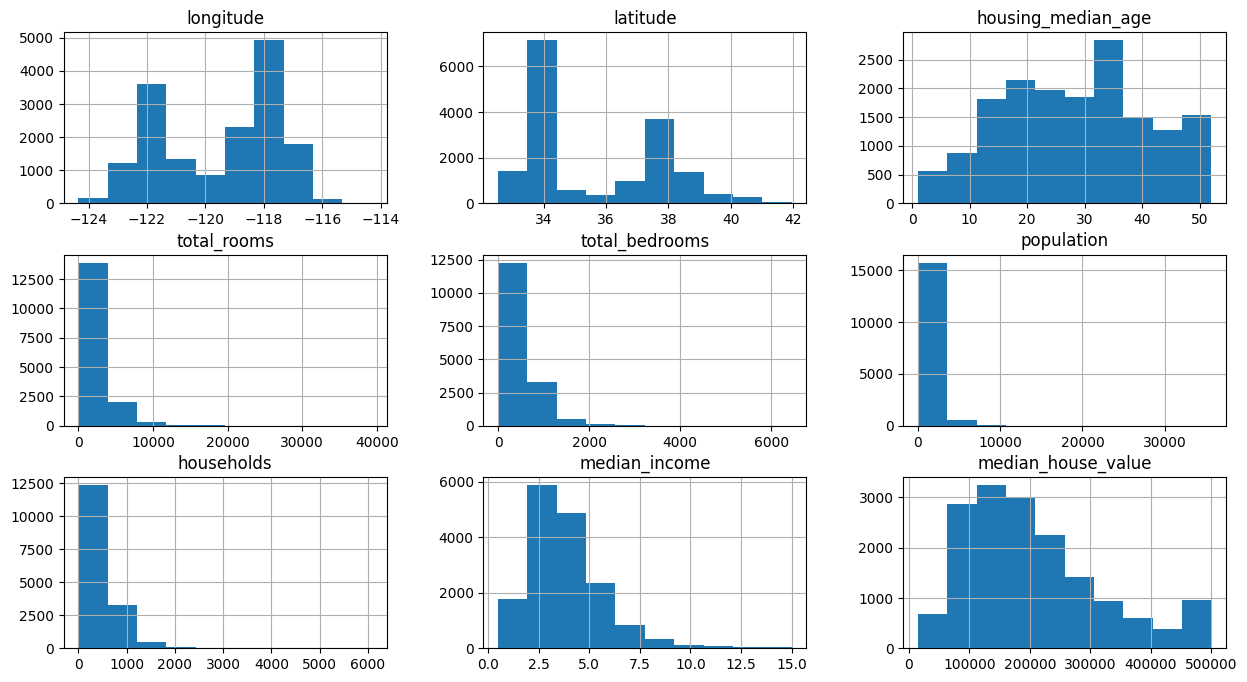

In [20]:
train_data.hist(figsize=(15,8))

In [44]:
# train_data_encoded = pd.get_dummies(train_data)
# # train_data_encoded.corr()
# plt.figure(figsize=(15,8))
# sns.heatmap(train_data_encoded.corr(), annot=True, cmap='coolwarm')
# drop ocean_proximity_<1H OCEAN
train_data.drop('ocean_proximity', axis=1, inplace=True)

In [45]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
13328,-117.66,34.05,6.0,5129.0,1119.0,2533.0,949.0,3.6250,113600.0
12388,-116.44,33.77,18.0,4872.0,1110.0,955.0,656.0,2.2439,97500.0
8834,-118.37,34.09,22.0,4247.0,1253.0,1766.0,1170.0,3.1517,341700.0
15913,-122.41,37.74,47.0,1728.0,398.0,1178.0,315.0,3.2813,229600.0
3368,-120.20,40.26,26.0,2399.0,518.0,1037.0,443.0,2.6765,47600.0
...,...,...,...,...,...,...,...,...,...
15779,-122.41,37.78,52.0,254.0,72.0,153.0,29.0,3.8625,350000.0
6404,-118.03,34.14,31.0,4353.0,1117.0,2338.0,1037.0,3.0727,242600.0
9936,-122.30,38.25,18.0,3548.0,880.0,1476.0,699.0,3.7188,163400.0
14950,-116.95,32.74,7.0,2722.0,578.0,1429.0,574.0,3.9583,141700.0


<Axes: >

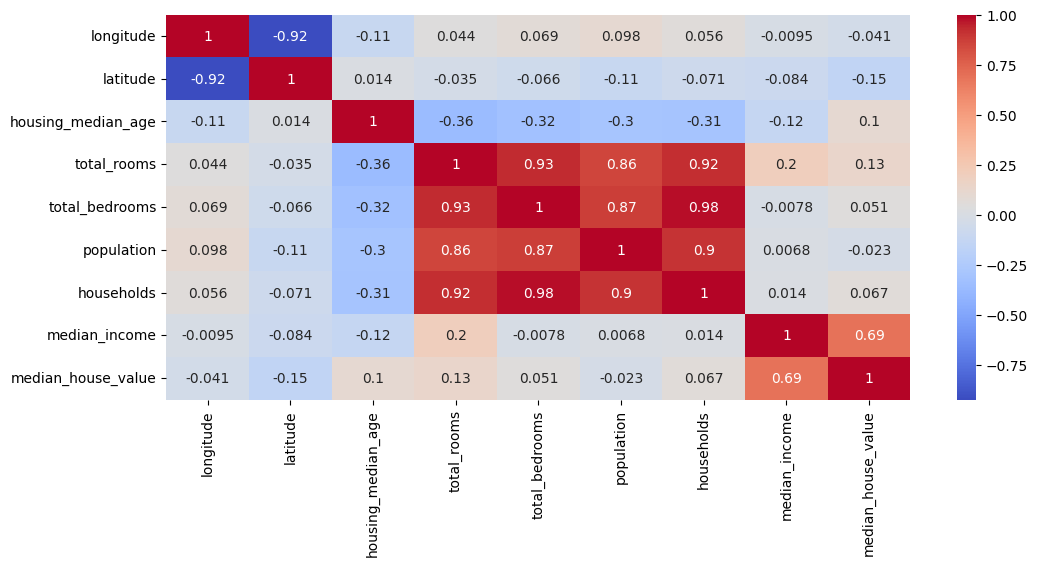

In [47]:
plt.figure(figsize=(12,5))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
# median_income is the most correlated feature with median_house_value AND can be used to predict it
# latitude is the least correlated feature with median_house_value so it must not be used to predict it

In [51]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1) # log transformation to reduce skewness
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

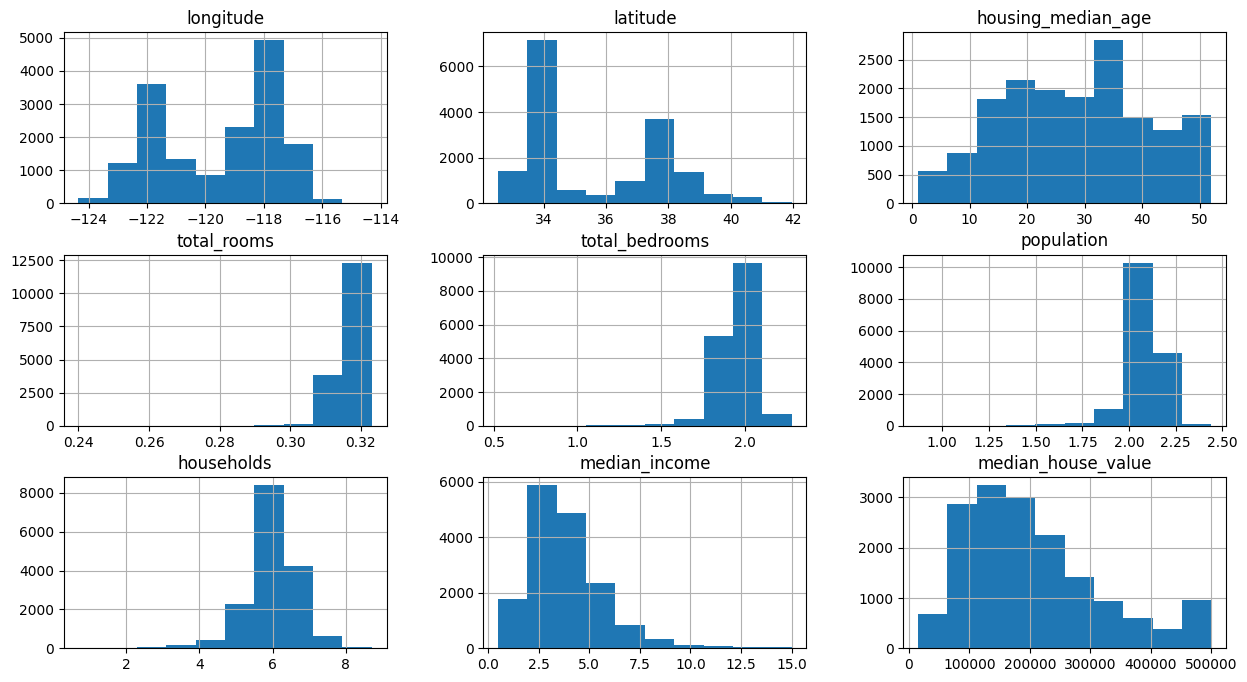

In [52]:
train_data.hist(figsize=(15,8))

In [79]:
# turning ocean_proximity into a numerical feature
#  adding back ocean_proximity_<1H OCEAN
train_data = X_train.join(y_train)

In [80]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7228
INLAND        5198
NEAR OCEAN    2103
NEAR BAY      1812
ISLAND           5
Name: count, dtype: int64

In [81]:
# train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)) # slice it into multiple featurest
# train_data = train_data.drop('ocean_proximity', axis=1)
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop('ocean_proximity',axis=1) # slice it into multiple featurest

In [82]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13328,-117.66,34.05,6.0,5129.0,1119.0,2533.0,949.0,3.6250,113600.0,False,True,False,False,False
12388,-116.44,33.77,18.0,4872.0,1110.0,955.0,656.0,2.2439,97500.0,False,True,False,False,False
8834,-118.37,34.09,22.0,4247.0,1253.0,1766.0,1170.0,3.1517,341700.0,True,False,False,False,False
15913,-122.41,37.74,47.0,1728.0,398.0,1178.0,315.0,3.2813,229600.0,False,False,False,True,False
3368,-120.20,40.26,26.0,2399.0,518.0,1037.0,443.0,2.6765,47600.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15779,-122.41,37.78,52.0,254.0,72.0,153.0,29.0,3.8625,350000.0,False,False,False,True,False
6404,-118.03,34.14,31.0,4353.0,1117.0,2338.0,1037.0,3.0727,242600.0,False,True,False,False,False
9936,-122.30,38.25,18.0,3548.0,880.0,1476.0,699.0,3.7188,163400.0,False,False,False,True,False
14950,-116.95,32.74,7.0,2722.0,578.0,1429.0,574.0,3.9583,141700.0,True,False,False,False,False


<Axes: >

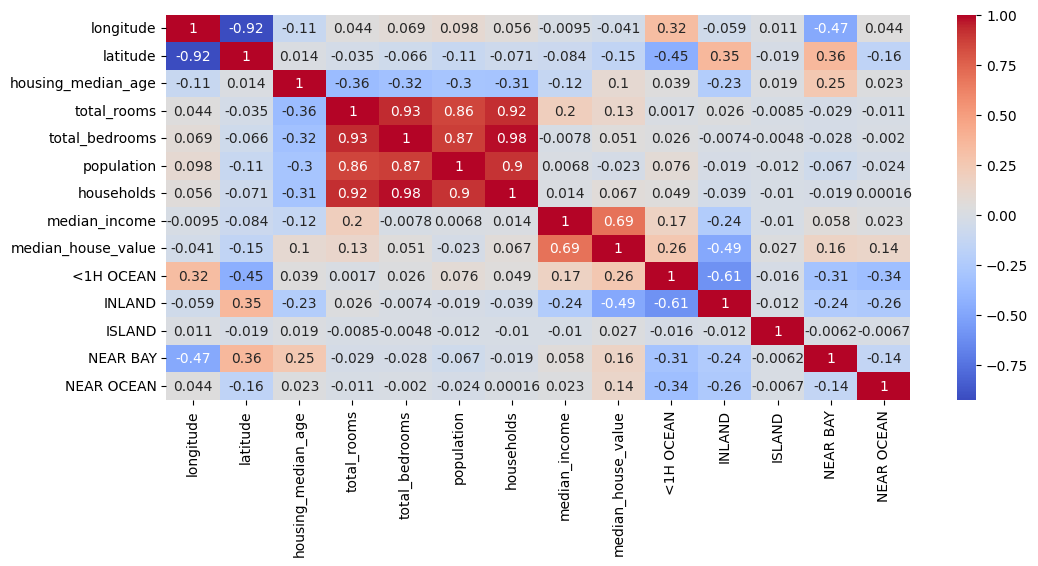

In [83]:
plt.figure(figsize=(12,5))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
# median_income is the most correlated feature with median_house_value AND can be used to predict it
# latitude is the least correlated feature with median_house_value so it must not be used to predict it

<Axes: xlabel='latitude', ylabel='longitude'>

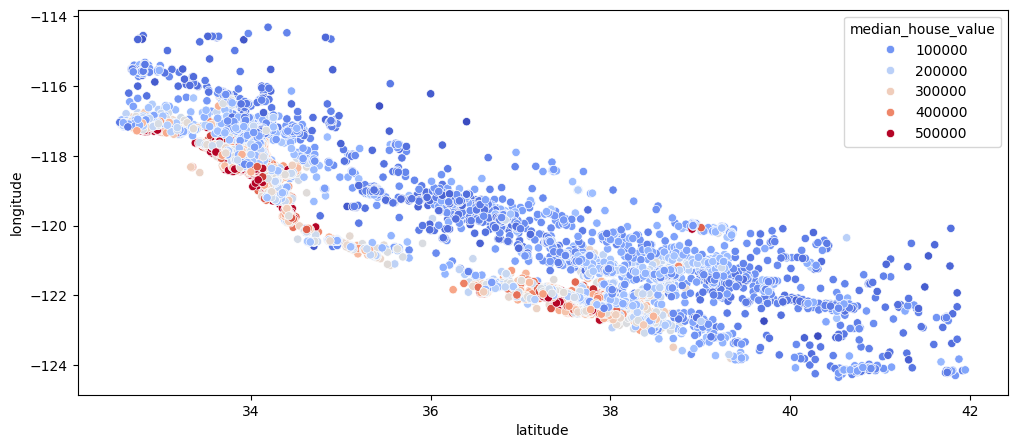

In [84]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')
# much more closer to the coast, higher the median_house_value